# Lecture 2 Linear and Multivarable Regression


     In the class we had a linear and Multicariable regression equation. 
     For both, we need to fine an optimized coefficients, beta0, beta1, and beta3.....

    # Linear Regression
    y = beta0 + beta1'X1 

    #Multivaraible regressure eqatio is written as
     y = beta0 + beta1'X1 + beta2*X2 + beta3*X3, 

    where beta0 is the regresion intercept and beta1-3 are regression coefficients for the independent varaibles X 
    
    
    In this example, two tasks will be presented
    
     Task 1: Practice 1 with Synthetic Data
     To check how Python Built in library do the regression model as we have seen in Excel
     Test first with clean data without noise such that alfa =0
     
     Task 2: Use Drilling data that has been cleaned and feature selected
     Input Features (x3 and x4)  and Target/Output variable (y)
     

In [3]:
# Step 1: Import librarties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # For data splitting 
from sklearn.linear_model import LinearRegression # For modelling splitted dataset 
from sklearn.metrics import mean_squared_error, r2_score  # For model preformance analysis

# Vi skal ikke gjøre steg 1 her i prosjektet, det er bare for trening

# Practice 1 with Synthetic Data
# Here generate clean data (alfa =0) and Noisy data (alfa non zero)
# def linear(x):
#     return 3+ 2*x +alfa*np.random.random(len(x))
# alfa =0

# def multivariable(Vs, DEN, NEU):
#     return beta0 + beta1*Vs + beta2*DEN + beta3*NEU
# alfa =0

# x= np.linspace(0,50,1000)

# df= pd.DataFrame({'x':x, 'y':linear(x)})

# df.to_excel('synthetic.xlsx', index =False)

# Step 2: Reading the dataset of synthetic and pre-processed drilling data with file name CleanOutlier1.xlsx: 

# Task 1 data
# df=pd.read_excel('synthetic.xlsx')


# Task 2 Data
df=pd.read_excel('CleanOutlier1.xlsx')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1059 non-null   float64
 1   DEN     1059 non-null   float64
 2   NEU     1059 non-null   float64
 3   Vp      1059 non-null   float64
dtypes: float64(4)
memory usage: 33.2 KB


# SKlearn based Regression

Training Data (741, 3)
Testing Data (318, 3)
Total Data (1059, 4)
[ 1.10471098  1.29970596 -0.94503717] -1.3581665391358113
Mean Squared Error: 0.005888396071119239
Root Mean Squared Error: 0.07673588515889576
R-Square: 0.9500210393288984


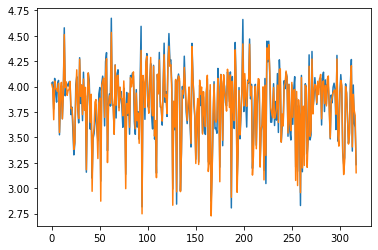

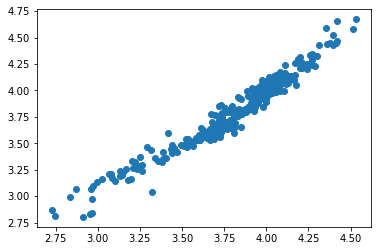

In [9]:
# Step 3: Data Splitting  
#2a: Define Target dependent variable (y) and independent variables (X)
# Input Features are x3 and x4 and target is y.
    #For linear regression, We will model y as a function of x3 and y as a function x4
    #For multivariable regression, we will model y as a linear combination of x3 and x4


# Data for Task 1
# X = df[['DEN']] # X er feature
# y = df['Vp']

# Her tester vi alle 3 variablene alene opp i mot vp
    
    
#Data For Task 2  
#Step 3a: Featuure and Target variables selection for linear regression: 
# By convention, we used Capital letter X for input features and small letter y, for target variable

#X= df[['x4']] # Here use double parenthesis
#y = df['y']

#Step 3b:  Feature and Target variables selection for Multivariable regression

X= df[['Vs','DEN','NEU']]  # Here use double parenthesis
y = df['Vp']

# X= df[['Vs','DEN']]  # Her bare Vs og DEN, vi må prøve alle varianter
# y = df['Vp']

# Til slutt velger vi den modellen som får best R^2 verdi

#X= df[['x3','x4']]  # Here use double parenthesis
#y = df['y']

# Another method of selecting features. select all features excep the las
#X = df.iloc[:,0:-1].values  # Except the last column , i.e y
#y = df.iloc[:,-1].values # Only the last column , i.e y


#Step 3c: split the data for training and testing with sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print ("Training Data",X_train.shape)
print ("Testing Data",X_test.shape)
print ("Total Data",df.shape)


#==================================================================
#Step 4 Machine learnine modelling and prediction
#We use a class called lineraRegression model to perform traning.
# Class LinearRegression as a function called .fit() used to generate the optimized coefficients
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #Fit function (for å lage modell) FOr å finne koeffisienter

#=================================================================

# Step 5 Prediction
# Class LinearRegression as a function called .predict() used to perform model prediction by using the optimized coefficients
y_pred = regressor.predict(X_test) # Her legger vi inn Xene fra 30% testing (se modell s 4). Han bruker samme navn som fra figuren.


# If we want to see the optimized coefficeints, we will use print(use....coef_,  regressor.intercept_)
print (regressor.coef_,regressor.intercept_) # a og b i ax + b

#============================================================
# Step 6 Model performance Accuracy Evaluations
# Function to calculate the R^2 for predicted and true dataset:

mse = mean_squared_error(y_test, y_pred)  # Mean square summ error between the prediction and the true value

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root means square error between the prediction and the true value

r2 = r2_score(y_test, y_pred)  # Regression coefficient 

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )


# Plotting
# Line plot
plt.plot((np.array(y_test)))
plt.plot(y_pred)
plt.show()

# Scatter plot
#print(y_pred)
#print(np.array(y_test))
plt.scatter(y_pred, np.array(y_test))
#plt.scatter(y_test, y_pred)

# R-square varierer fordi det varierer hvilke linjer fra Excel dokumentet som
# havner i 70% bulken, og hvilke som havner i 30% bulken

# Homework: Do your project
    Using your cleaned project file, use the code to generate models
    a) Linear regression.....Vp as a function of DEN, NEU and Vs
    b) Multivariable regression...Vp as a function of the combination of Vs, DEN and NEU